## Trabalho 1 de Regressão

#### 1. Carregando pacotes

In [ ]:
library(hnp) # pacote para envelope simulado
library(lmtest) # teste reset
library(car) # para teste de multicolinearidade (fatores de inflacao de variancia)
library(tseries) # teste de Jarque-Bera

#### 2. Importando dados

In [14]:
dados <- read.table("dados/dados-trabalho1.txt",h=T)
head(dados)

,y,x1,x2,x3,x4,x5,x6,x7
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,110.038,1,57.361,0.434,4.317,12,1.715,104.320
2,86.445,1,52.070,0.437,4.052,13,2.221,94.936
3,152.419,1,61.397,0.727,7.854,8,7.148,87.870
4,114.720,1,42.482,0.244,2.297,9,2.272,103.660
5,111.444,1,29.660,0.449,4.509,6,2.444,101.167
6,147.882,1,58.217,0.363,4.506,13,6.971,86.432


y = variável resposta/variável dependente/endógena 

x1, x2, x3, x4, x5, x6 e x7 = covariáveis/variáveis independentes/exógenas

#### 3. Análise descritiva

In [15]:
summary(dados)

       y                x1               x2               x3        
 Min.   : 43.90   Min.   :0.0000   Min.   : 24.32   Min.   :0.0860  
 1st Qu.: 85.96   1st Qu.:0.0000   1st Qu.: 44.51   1st Qu.:0.3090  
 Median :105.88   Median :1.0000   Median : 55.05   Median :0.4270  
 Mean   :111.00   Mean   :0.6168   Mean   : 52.80   Mean   :0.4466  
 3rd Qu.:127.98   3rd Qu.:1.0000   3rd Qu.: 59.79   3rd Qu.:0.5615  
 Max.   :259.91   Max.   :1.0000   Max.   :102.59   Max.   :0.9240  
       x4              x5              x6               x7        
 Min.   :0.822   Min.   : 3.00   Min.   : 0.000   Min.   : 74.92  
 1st Qu.:3.163   1st Qu.: 8.00   1st Qu.: 0.840   1st Qu.: 93.78  
 Median :4.422   Median :11.00   Median : 2.490   Median :100.89  
 Mean   :4.517   Mean   :10.47   Mean   : 3.613   Mean   :100.44  
 3rd Qu.:5.495   3rd Qu.:13.00   3rd Qu.: 5.415   3rd Qu.:106.93  
 Max.   :9.068   Max.   :21.00   Max.   :18.767   Max.   :146.85  

In [17]:
cor(dados)

,y,x1,x2,x3,x4,x5,x6,x7
y,1.00000000,0.23490266,0.05849505,0.20454929,0.22926803,0.17610611,0.91622003,-0.04402367
x1,0.23490266,1.00000000,-0.01147521,0.09072338,0.09408009,0.06330647,-0.03130120,0.11475532
x2,0.05849505,-0.01147521,1.00000000,0.17953373,0.16006808,0.17923504,0.10810729,0.13952750
x3,0.20454929,0.09072338,0.17953373,1.00000000,0.95864032,-0.00811143,0.07302343,0.12269842
x4,0.22926803,0.09408009,0.16006808,0.95864032,1.00000000,-0.02744731,0.09554190,0.05386186
x5,0.17610611,0.06330647,0.17923504,-0.00811143,-0.02744731,1.00000000,0.19293278,0.24558583
x6,0.91622003,-0.03130120,0.10810729,0.07302343,0.09554190,0.19293278,1.00000000,-0.03669080
x7,-0.04402367,0.11475532,0.13952750,0.12269842,0.05386186,0.24558583,-0.03669080,1.00000000


Podemos observar que há uma correlação muito forte entre x4 e x3 (0.95864032), possivelmente uma multicolineariedade, algo que devemos evitar.

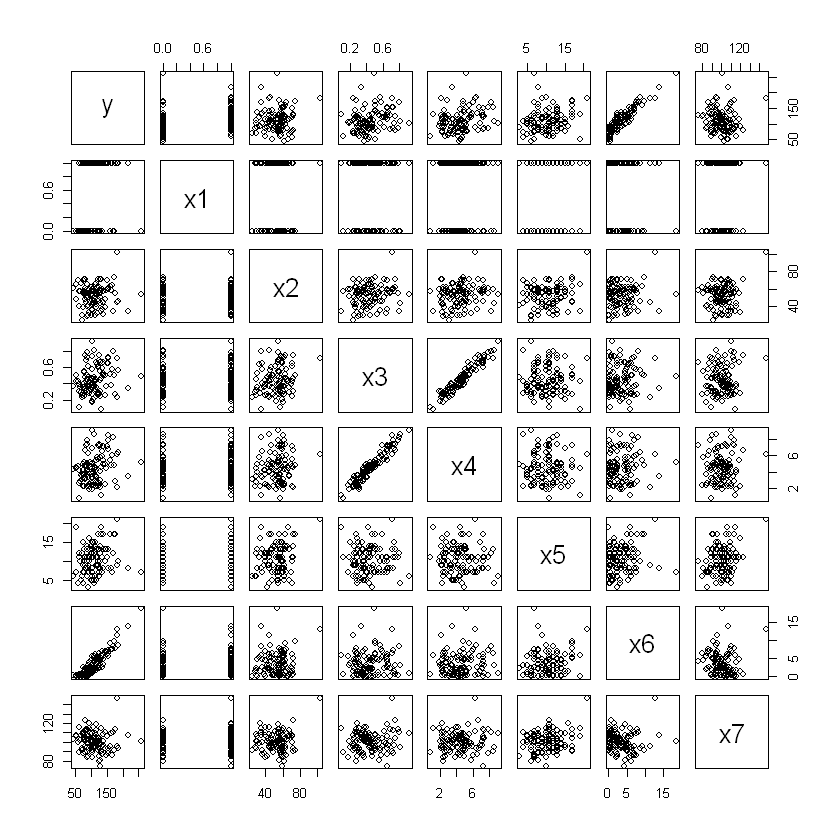

In [18]:
plot(dados)

Y está bem correlacionado com a covariável x6, observando o gráfico vemos essa maior influência.

#### 4. Ajustando o modelo

In [19]:
# modelando y em função das covariáveis
fit <- lm(y~x1+x2+x3+x4+x5+x6+x7,data=dados)

In [21]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.076  -6.026  -0.214   7.436  21.794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.46224   10.18764   7.309 7.02e-11 ***
x1          18.99352    2.03183   9.348 2.89e-15 ***
x2          -0.15909    0.08117  -1.960   0.0528 .  
x3          16.22563   20.72954   0.783   0.4357    
x4           1.12853    1.99299   0.566   0.5725    
x5           0.06316    0.28217   0.224   0.8233    
x6          10.02365    0.30531  32.831  < 2e-16 ***
x7          -0.15932    0.10050  -1.585   0.1161    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.08 on 99 degrees of freedom
Multiple R-squared:  0.928,	Adjusted R-squared:  0.9229 
F-statistic: 182.3 on 7 and 99 DF,  p-value: < 2.2e-16


$R^2$ do modelo foi 0.928. Ou seja, o modelo explica 92,8% da variabilidade de y;

$\overline{R^2}$, o critério de seleção, foi 0.9229;

Pelo teste F se rejeitou HO, ou seja, pelo menos um beta é diferente de zero e por isso existe relação de regressão;

O teste T, observando os p-valores, apenas o intercepto, x1 e x6 possuem betas diferentes de zero. Assumo então que x1 e x6 são variáveis importantes e precisam ficar no modelo.

**IMPORTANTE : Antes de acreditar nesses testes se faz necessário análise de diagnóstico.**

#### 5. Testando as suposições do modelo

    [S0] O modelo estah corretamente especificado
    [S1] A media dos erros eh zero
    [s2] Homoscedasticidade dos erros
    [S3] Nao autocorrelacao 
    [S4] Ausencia de Multicolinearidade
    [S5] Normalidade dos erros

Obs.: Para testes de hipoteses, se p-value < alpha (5%) 
entao rejeita a hipotese nula (H0)

In [22]:

#Testa [S0]
#Teste RESET de especificacao
#H0: O modelo estah corretamente especificado
resettest(fit)


	RESET test

data:  fit
RESET = 0.22665, df1 = 2, df2 = 97, p-value = 0.7976


p-valor > alpha(5%) 

Não se rejeita H0 de que o modelo está correto

In [23]:
#Testa [S1]
#Teste t para a média dos errros
#H0: média dos erros eh igual a zero
t.test(resid(fit),mu=0,alternative="two.sided")


	One Sample t-test

data:  resid(fit)
t = 0, df = 106, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.866551  1.866551
sample estimates:
mean of x 
        0 


p-valor > alpha(5%%)

Não se rejeita H0 de que a média dos erros é 0

In [24]:
#Testa [s2]
#Teste de Bressch-Pagan (Koenker) de Heteroscedasticidade
#H0: erros sao homoscedasticos
bptest(fit, studentize = TRUE)


	studentized Breusch-Pagan test

data:  fit
BP = 13.037, df = 7, p-value = 0.07121


p-valor > alpha(5%)

Não se rejeita H0 de que a variância dos erros são homoscedásticos

In [26]:
#Testa [S3]
#Teste de Durbin-Watson de autocorrelacao
#H0: : Nao hah autocorrelacao 
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 2.1676, p-value = 0.8131
alternative hypothesis: true autocorrelation is greater than 0


p-valor > alpha(5%) 

Não se rejeita H0, não há covariância dos erros

In [27]:
#Teste [S4]
#Usa Fatores de Inflacao de Variancia para detectar multicolinearidade
#Regra de bolso: vif > 10 indica multicolinearidade. vif=1 seria o ideal.
vif(fit)

x1        x2        x3        x4        x5        x6        x7 
 1.028139  1.084200 13.282074 13.152059  1.143658  1.070938  1.160900

Através dos vifs podemos obsevar que x1, x2, x6 e x7 temos o ideal.

Já em x3 e x4 vemos valores maiores que 10, um indicativo de multicolinearidade.